#Etapa 1: Recopilación y Preparación de Datos (Clases 1 a 4)

## 1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

ruta_base = '/content/drive/MyDrive/Talento tech/Pre entrega/datasets'


In [ ]:
ventas = pd.read_csv(f"{ruta_base}/ventas.csv")    #Cargo los dataframes
clientes = pd.read_csv(f"{ruta_base}/clientes.csv")
marketing = pd.read_csv(f"{ruta_base}/marketing.csv")

In [ ]:
# ====================================================
# Descarga de datasets desde Google Drive (opcional)
# ----------------------------------------------------
# Este bloque permite descargar los archivos directamente
# sin necesidad de subirlos manualmente ni montar Drive.
# Es necesario que los archivos tengan permiso "Cualquiera con el enlace → Lector".
# ====================================================

!gdown --id 1CC4qltRKtC6Z7k356lbWueLs6xKP1QpS -O ventas.csv
!gdown --id 1uF5VcV9BaVkv5iBlr8ghpKwddUj6BB2M -O clientes.csv
!gdown --id 1zFQmrn1lC-T_19bo-cADKL0rud1R6Ago -O marketing.csv

# Verificamos que se descargaron correctamente
!ls -lh



/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CC4qltRKtC6Z7k356lbWueLs6xKP1QpS
To: /content/ventas.csv
100% 166k/166k [00:00<00:00, 67.4MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uF5VcV9BaVkv5iBlr8ghpKwddUj6BB2M
To: /content/clientes.csv
100% 24.2k/24.2k [00:00<00:00, 54.4MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.

In [ ]:
print("ventas:", ventas.shape)    #Veo los tamaños de los dataframes filas y columnas para revisar que este todo bien
print("clientes:", clientes.shape)
print("marketing:", marketing.shape)

ventas: (3035, 6)
clientes: (567, 5)
marketing: (90, 6)


##2. Realizar un script básico que calcule las ventas mensuales utilizando variables y operadores.


In [ ]:
# Ver el tipo de dato de cada columna
print(ventas.dtypes)

# Ver un resumen rápido de las primeras filas
print(ventas.head())

# Opcional: info más detallada
print(ventas.info())


id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3 

Antes de hacer los cálculos revise los tipos de datos  y vi que el precio está en formato objeto (texto) y fecha_venta también.
Precio deberia verse como float64 y fecha de venta como datatime


In [67]:
# Convertir precio de string a número (sacar el $ y pasar a float)
# ventas["precio"] = ventas["precio"].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-885091853.py:2: SyntaxWarning:

invalid escape sequence '\$'



In [64]:
 # Calcular la venta de cada fila
ventas["venta_total"] = ventas["precio"] * ventas["cantidad"]

In [68]:
# Asegurar que fecha sea datetime
ventas["fecha_venta"] = pd.to_datetime(ventas["fecha_venta"], format="%d/%m/%Y")


In [74]:
# Agrupar por mes y sumar ventas
ventas_mensuales = ventas.groupby(ventas["fecha_venta"].dt.to_period("M"))["cantidad"].sum()

print(ventas_mensuales)

fecha_venta
2024-01    129604.99
2024-02    118672.44
2024-03    136779.15
2024-04    128430.69
2024-05    143727.25
2024-06    108480.17
2024-07    116229.97
2024-08    119680.15
2024-09    115787.85
2024-10    112117.13
2024-11    119951.79
2024-12    117631.94
Freq: M, Name: cantidad, dtype: float64


## 3. Estructuras de Datos: Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.

In [ ]:
# Estructura de datos: lista de ventas (cada venta es un diccionario)
#ventas_lista_ejemplo = [
   # {"producto": "Cuadro decorativo", "precio": 69.94, "cantidad": 5},
   #  {"producto": "Lámpara de mesa", "precio": 105.10, "cantidad": 5},
   #  {"producto": "Secadora", "precio": 97.96, "cantidad": 3},
   #  {"producto": "Heladera", "precio": 114.35, "cantidad": 8}
# ]

# Ejemplo: calcular ventas totales
# for venta in ventas_lista_ejemplo:
   #  total = venta["precio"] * venta["cantidad"]
   #  print(f'Producto: {venta["producto"]}, Total vendido: ${total:.2f}')

Utilice diccionarios porque lista todo de forma mas clara

## 4. Introducción a Pandas: realizar un análisis exploratorio inicial de los  DataFrames.

In [ ]:
def explorar_simple(df, nombre="DATAFRAME"):
    print()
    print("="*50)
    print(f" EXPLORACIÓN DE: {nombre.upper()}")
    print("="*50)

    # Shape
    print(f"\n➡️ Shape (filas, columnas): {df.shape}")

    # Tipos de datos
    print("\n➡️ Tipos de datos:")
    print(df.dtypes)

    # Nulos
    print("\n➡️ Nulos por columna:")
    print(df.isnull().sum())

    # Duplicados
    print("\n➡️ Filas duplicadas:")
    print(df.duplicated().sum())

    # Primeras filas
    print("\n➡️ Primeras 5 filas:")
    print(df.head())

    # Resumen numérico
    print("\n➡️ Resumen numérico:")
    print(df.select_dtypes(include='number').describe())

    # Resumen categórico
    print("\n➡️ Resumen categórico:")
    print(df.select_dtypes(include=['object', 'string', 'category']).describe())



In [ ]:
# VENTAS
explorar_simple(ventas, "ventas")


 EXPLORACIÓN DE: VENTAS

➡️ Shape (filas, columnas): (3035, 6)

➡️ Tipos de datos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

➡️ Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

➡️ Filas duplicadas:
35

➡️ Primeras 5 filas:
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  

➡️ Resumen numérico:
          id_venta     canti

El dataframe de ventas tiene 35 filas duplicadas, y 2 valores nulos en el campo precio y dos valores nulos en el campo cantidad. Ademas fecha de inicio y precio esta como obtejo y deberian estar como dataime y float, respectivamente

In [ ]:
# CLIENTES
explorar_simple(clientes, "clientes")


 EXPLORACIÓN DE: CLIENTES

➡️ Shape (filas, columnas): (567, 5)

➡️ Tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

➡️ Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

➡️ Filas duplicadas:
0

➡️ Primeras 5 filas:
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65

➡️ Resumen numérico:
       id_cliente        edad      ingresos
count  567.000000  567.000000    567.000000
mean   284.000000   37.940035  34668.739012
std    163.823075   10.202885  12974.531446
min      1.000000   20.000000    17

In [ ]:
# MARKETING
explorar_simple(marketing, "marketing")


 EXPLORACIÓN DE: MARKETING

➡️ Shape (filas, columnas): (90, 6)

➡️ Tipos de datos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

➡️ Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

➡️ Filas duplicadas:
0

➡️ Primeras 5 filas:
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024

➡️ Resumen numérico:
       id_campanha      costo
count    90.000000  90.000000
mean     45.500000   4.928667
std      26.124701   0.947750

## 5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

### **Limpieza de Datos**
Hay que realizar la depuración del conjunto de datos para eliminar duplicados y caracteres no deseados, documentando cada paso del proceso y los resultados obtenidos.

---

### **Hallazgos Clave durante la Exploración**

- **`ventas.precio`** está registrado como texto e incluye el símbolo “$”; se requiere convertirlo a formato numérico.  
- **`ventas.fecha_venta`**, **`marketing.fecha_inicio`** y **`marketing.fecha_fin`** se encuentran en formato de texto (`dd/mm/aaaa`); deben transformarse a tipo `datetime` utilizando `dayfirst=True`.  
- **`ventas.cantidad`** presenta 2 valores nulos y **`ventas.precio`** otros 2; estas filas impiden calcular el importe correctamente.  
- El dataset **`ventas`** contiene **35 filas duplicadas exactas**.

---

### **Decisiones Tomadas (Documentadas)**

- **Estandarización de precios:** eliminar el símbolo `$` y convertir los valores a tipo `float`.  
- **Conversión de fechas:** parsear las columnas de fecha con `dayfirst=True` para mantener coherencia con el formato local.  
- **Tratamiento de valores nulos críticos:** eliminar las filas con valores nulos en `precio` o `cantidad`, ya que imposibilitan el cálculo del importe.  
- **Depuración de duplicados:** eliminar las filas duplicadas exactas en el dataset `ventas`.  
- **Creación de campo derivado:** generar una nueva columna `importe = precio * cantidad` para los análisis posteriores.

---

**Nota:** En esta primera entrega se optó por eliminar los valores nulos críticos para preservar la integridad de las métricas. En futuras versiones, podría considerarse la imputación de datos, pero en esta instancia se priorizó la transparencia y la reproducibilidad del proceso.


#Etapa 2: Preprocesamiento y Limpieza de Datos (Clases 5 a 8)

1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y
caracteres no deseados. Documentar el proceso y los resultados.

In [ ]:
# ====================================================
# 0) Controles previos a la limpieza
# ----------------------------------------------------
# Estos datos nos servirán para documentar la bitácora,
# justificar decisiones y comparar los resultados antes
# y después del proceso de depuración.
# ====================================================

# Guardar métricas iniciales del dataset
prev_shape = ventas.shape
prev_nulos_precio = ventas['precio'].isna().sum()
prev_nulos_cantidad = ventas['cantidad'].isna().sum()
prev_duplicados = ventas.duplicated().sum()

# Mostrar resumen inicial
print("=" * 50)
print("ESTADO INICIAL DEL DATASET 'VENTAS'")
print("=" * 50)
print(f"Total de filas y columnas: {prev_shape}")
print(f"Valores nulos en 'precio'  : {prev_nulos_precio}")
print(f"Valores nulos en 'cantidad': {prev_nulos_cantidad}")
print(f"Filas duplicadas exactas   : {prev_duplicados}")
print("=" * 50)


ESTADO INICIAL DEL DATASET 'VENTAS'
Total de filas y columnas: (3035, 6)
Valores nulos en 'precio'  : 2
Valores nulos en 'cantidad': 2
Filas duplicadas exactas   : 35


In [ ]:
import numpy as np
# ====================================================
# 1) Normalizar columna 'precio' (de string a float)
# ====================================================

if 'precio' in ventas.columns:
    # Eliminar símbolos no numéricos ($, comas, espacios)
    # y respetar los valores nulos originales
    ventas['precio'] = (
        ventas['precio']
        .astype(str)
        .str.replace(r'[^0-9.\-]', '', regex=True)  # deja solo dígitos, punto y signo
        .replace({'': np.nan})                      # convierte cadenas vacías a NaN
    )

    # Convertir la columna a tipo numérico (float)
    ventas['precio'] = pd.to_numeric(ventas['precio'], errors='coerce')


In [ ]:
# ====================================================
# 2) Conversión de columnas de fechas en "ventas" y "marketing"
# ====================================================

# Convertir la columna 'fecha_venta' a tipo datetime si existe
if 'fecha_venta' in ventas.columns:
    ventas['fecha_venta'] = pd.to_datetime(
        ventas['fecha_venta'],
        format='%d/%m/%Y',   # formato explícito mejora la velocidad y precisión
        errors='coerce'      # convierte valores inválidos en NaT
    )

# Convertir fechas de inicio y fin en el dataset de marketing
for col in ['fecha_inicio', 'fecha_fin']:
    if col in marketing.columns:
        marketing[col] = pd.to_datetime(
            marketing[col],
            format='%d/%m/%Y',
            errors='coerce'
        )


In [ ]:
# ====================================================
# 3) Eliminar filas con valores nulos críticos en "ventas"
#    (columnas: 'precio' y 'cantidad')
# ====================================================

# Crear una máscara que identifique filas válidas (sin nulos en precio ni cantidad)
mask_validos = ventas['precio'].notna() & ventas['cantidad'].notna()

# Contar cuántas filas serán eliminadas
filas_eliminadas = ventas.shape[0] - mask_validos.sum()

# Filtrar el dataset conservando solo las filas válidas
ventas = ventas.loc[mask_validos].copy()

# Mostrar resumen del proceso
print(f"Se eliminaron {filas_eliminadas} filas con nulos en 'precio' o 'cantidad'.")
print(f"Total de filas restantes: {ventas.shape[0]}")


Se eliminaron 2 filas con nulos en 'precio' o 'cantidad'.
Total de filas restantes: 3033


In [ ]:
# ====================================================
# 4) Eliminar filas duplicadas exactas en "ventas"
# ====================================================

# Guardar el número de filas original
filas_antes = ventas.shape[0]

# Eliminar duplicados exactos
ventas = ventas.drop_duplicates().copy()

# Calcular cuántas filas fueron eliminadas
filas_despues = ventas.shape[0]
duplicados_eliminados = filas_antes - filas_despues

# Mostrar resumen del proceso
print(f"Se eliminaron {duplicados_eliminados} filas duplicadas.")
print(f"Total de filas restantes: {filas_despues}")


Se eliminaron 35 filas duplicadas.
Total de filas restantes: 2998


In [ ]:
# ====================================================
# 5) Calcular el total (precio * cantidad) y guardar en 'cantidad'
# ====================================================

# Sobrescribe la columna 'cantidad' con el valor total
ventas['cantidad'] = ventas['precio'] * ventas['cantidad']

# Verificación
print("Columna 'cantidad' sobrescrita con el total de cada venta.")
print(ventas[['precio', 'cantidad']].head())


Columna 'cantidad' sobrescrita con el total de cada venta.
   precio  cantidad
0   69.94    349.70
1  105.10    525.50
2   97.96    293.88
3  114.35    914.80
4  106.21    424.84


In [ ]:
# ----------------------------------------------------
# 6) Reporte post-limpieza
# ----------------------------------------------------
print("-"*40)
print("Después de limpiar")
print("-"*40)
print("shape:", ventas.shape)
print("Filas eliminadas por nulos críticos (precio/cantidad):", filas_eliminadas)
print("Duplicados eliminados:", duplicados_eliminados)

----------------------------------------
Después de limpiar
----------------------------------------
shape: (2998, 6)
Filas eliminadas por nulos críticos (precio/cantidad): 2
Duplicados eliminados: 35


2. Transformación de Datos: Aplicar filtros y transformaciones para crear una
tabla de ventas que muestre solo los productos con alto rendimiento.

In [ ]:
# Create tabla_por_producto by grouping ventas by product and summing the total sales
tabla_por_producto = ventas.groupby('producto')['cantidad'].sum().reset_index()

# Rename the columns for clarity
tabla_por_producto.columns = ['producto', 'ingresos_totales']

# Display the new DataFrame
print("Tabla por producto con ingresos totales:")
display(tabla_por_producto.head())

Tabla por producto con ingresos totales:


,producto,ingresos_totales
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [ ]:
# ====================================================
# Transformación de Datos: Productos de Alto Rendimiento
# ----------------------------------------------------
# Criterio único → Top-N productos por ingresos totales
# ====================================================

# Parámetro configurable
TOP_N = 10  # cantidad de productos con mayor ingreso total

# Ordenar la tabla por ingresos (de mayor a menor)
tabla_ordenada = tabla_por_producto.sort_values(
    "ingresos_totales", ascending=False
).reset_index(drop=True)

# ----------------------------------------------------
# Criterio: Seleccionar los Top-N por ingresos totales
# ----------------------------------------------------
if not tabla_ordenada.empty:  # verificar que haya registros
    if len(tabla_ordenada) >= TOP_N:
        # Valor del ingreso del producto que ocupa la posición N
        umbral = float(tabla_ordenada.iloc[TOP_N - 1]["ingresos_totales"])

        # Incluir todos los productos con ingresos ≥ umbral
        top_por_ingresos = tabla_ordenada[
            tabla_ordenada["ingresos_totales"] >= umbral
        ].copy()
    else:
        # Si hay menos de N productos, incluir todos
        top_por_ingresos = tabla_ordenada.copy()
else:
    # Si no hay datos, devolver DataFrame vacío
    top_por_ingresos = tabla_ordenada.copy()

# ----------------------------------------------------
# Salida
# ----------------------------------------------------
print("\n" + "="*60)
print(f"Top-{TOP_N} productos por ingresos totales")
print("="*60)
display(top_por_ingresos)

# Mini resumen
print("\n" + "="*60)
print("Resumen")
print("="*60)
print(f"Total productos distintos : {len(tabla_por_producto)}")
print(f"En Top-{TOP_N} por ingresos : {len(top_por_ingresos)}")
print("="*60)


Top-10 productos por ingresos totales


,producto,ingresos_totales
0,Lámpara de mesa,82276.38
1,Auriculares,74175.58
2,Microondas,72562.89
3,Cafetera,59607.31
4,Cuadro decorativo,54297.60
5,Smartphone,54132.44
6,Secadora,52115.45
7,Jarrón decorativo,51130.88
8,Batidora,50979.20
9,Rincón de plantas,50456.45



Resumen
Total productos distintos : 30
En Top-10 por ingresos : 10


## 🧾 Definición de alto rendimiento según mi análisis

En este análisis se definió **alto rendimiento** como el desempeño de los productos en función de los **ingresos totales generados** durante el período analizado.  

Para ello, se construyó una tabla agrupada por producto, calculando el monto total vendido (`ingresos_totales`) y luego se aplicó un criterio cuantitativo basado en el **Top 10 de productos con mayores ingresos**.  

Este enfoque permite identificar aquellos artículos que:

- **Aportan mayor facturación total**, independientemente del volumen de unidades vendidas.  
- **Tienen una alta demanda o un precio unitario elevado**, lo que los posiciona como los de mejor desempeño económico.  
- **Representan los principales generadores de ingresos** para la empresa dentro del catálogo analizado.

---

## 📊 Resultados obtenidos

El análisis muestra que los productos con **mayor rendimiento económico** son, principalmente, aquellos asociados a un valor unitario medio-alto y una buena rotación, destacándose:

- **Lámpara de mesa** y **Auriculares**, con los ingresos más altos, superando los $70.000.  
- **Microondas** y **Cafetera**, también con cifras significativas dentro del Top 10.  

En total, el conjunto de productos analizados fue de **30**, y se identificaron los **10 con mejor desempeño** económico según el criterio establecido.

---

## 💡 Conclusión interpretativa

Definir el **alto rendimiento en función de los ingresos totales** permite priorizar los productos más rentables desde una perspectiva económica global, sin limitarse únicamente a las unidades vendidas.  

Esto brinda una base sólida para decisiones estratégicas como:

- Focalizar esfuerzos de marketing en productos de alto ingreso.  
- Reforzar stock o disponibilidad de los artículos con mayor impacto en las ventas totales.  
- Identificar oportunidades de mejora en productos con baja contribución económica.


3. Agregación: Resumir las ventas por categoría de producto y analizar los
ingresos generados.

In [ ]:
# ====================================================
# OPCIÓN A: Resumen "Clásico" por Categoría
# ----------------------------------------------------
# Etapa 2 - Actividad 3: Agregación
# Objetivo: resumir las ventas por categoría de producto
# y analizar los ingresos generados.
# ====================================================

# ----------------------------------------------------
# 1) Agrupar y resumir por categoría
# ----------------------------------------------------
resumen_cat = (
    ventas.groupby('categoria', as_index=False)
    .agg({
        'cantidad': 'sum',          # ingresos totales (ahora en 'cantidad')
        'id_venta': 'count'        # cantidad de transacciones
    })
    .rename(columns={
        'cantidad': 'ingresos',
        'id_venta': 'transacciones'
    })
    .sort_values('ingresos', ascending=False)
    .reset_index(drop=True)
)

# ----------------------------------------------------
# 2) Calcular participación de cada categoría (%)
# ----------------------------------------------------
total_ingresos = resumen_cat['ingresos'].sum()
resumen_cat['participacion_%'] = (
    (resumen_cat['ingresos'] / total_ingresos) * 100
).round(2)

# ----------------------------------------------------
# 3) Calcular ticket promedio por transacción
# ----------------------------------------------------
resumen_cat['ticket_promedio'] = (
    resumen_cat['ingresos'] / resumen_cat['transacciones']
).round(2)

# ----------------------------------------------------
# 4) Mostrar resultados
# ----------------------------------------------------
print("\n" + "="*60)
print("Resumen clásico por categoría de producto")
print("="*60)
display(resumen_cat)

# Mini resumen adicional
print("\n" + "-"*60)
print("Total categorías:", len(resumen_cat))
print("Total ingresos   :", f"${total_ingresos:,.2f}")
print("-"*60)



Resumen clásico por categoría de producto


,categoria,ingresos,transacciones,participacion_%,ticket_promedio
0,Electrodomésticos,505299.63,1000,34.44,505.30
1,Electrónica,482577.80,998,32.89,483.54
2,Decoración,479216.09,1000,32.66,479.22



------------------------------------------------------------
Total categorías: 3
Total ingresos   : $1,467,093.52
------------------------------------------------------------


4. Integración de Datos: Combinar los sets de datos de ventas y marketing
para obtener una visión más amplia de las tendencias.

# Etapa 3 - Análisis de datos

### 3.1 Estadística descriptiva de las ventas

In [ ]:
stats_precio = ventas['precio'].describe()
stats_precio


,precio
count,2998.000000
mean,75.291318
std,28.736008
min,26.000000
25%,50.030000
50%,75.205000
75%,100.067500
max,124.970000


Para obtener ventas_total, unidades_vendidas y ROAS necesito integrar ventas + marketing:

In [ ]:
ventas['importe'] = ventas['precio'] * ventas['cantidad']


In [ ]:
ventas_prod = ventas.groupby('producto').agg({
    'importe': 'sum',
    'cantidad': 'sum'
}).rename(columns={
    'importe': 'ventas_total',
    'cantidad': 'unidades_vendidas'
})


In [ ]:
mkt_prod = marketing.groupby('producto').agg({
    'costo': 'sum',          # suma de la inversión en marketing
    'id_campanha': 'nunique' # cantidad de campañas distintas
}).rename(columns={
    'costo': 'inversion_total',
    'id_campanha': 'campañas'
})

mkt_prod.head()


,inversion_total,campañas
producto,,
Adorno de pared,14.05,3
Alfombra,17.46,3
Aspiradora,16.46,3
Auriculares,15.24,3
Batidora,15.28,3


In [ ]:
prod_global = ventas_prod.merge(mkt_prod, on='producto', how='left')

prod_global['ticket_medio'] = prod_global['ventas_total'] / prod_global['unidades_vendidas']
prod_global['ROAS'] = prod_global['ventas_total'] / prod_global['inversion_total']


In [ ]:
prod_global[['ventas_total', 'unidades_vendidas', 'ROAS']].describe()


,ventas_total,unidades_vendidas,ROAS
count,3.000000e+01,30.000000,30.000000
mean,4.218267e+06,48903.117333,286530.330900
std,1.176432e+06,13265.561715,78911.580807
min,8.874020e+05,11128.800000,60573.518020
25%,3.873575e+06,45601.920000,260954.316826
50%,4.181110e+06,48140.245000,293073.245363
75%,4.466437e+06,51092.960000,320176.411579
max,6.851353e+06,82276.380000,452875.484278


📝 Informe – Estadística descriptiva de las ventas
Ventas a nivel transacción

El precio promedio por transacción es de **75.29**, con una mediana muy similar (**75.20**), lo que sugiere una distribución equilibrada. Los valores oscilan entre **26** y **124.97**, indicando una oferta de productos bastante diversa. El desvío estándar (**28.73**) refleja variabilidad moderada en los valores de venta. El catálogo presenta productos económicos y otros mucho más costosos, lo que refleja una oferta heterogénea.

Ventas agregadas por producto (prod_global)

ventas_total: En promedio, cada producto genera alrededor de **4.2 millones**, aunque existen diferencias grandes entre productos, como muestra el rango entre su mínimo y máximo.

unidades_vendidas: Los productos venden en promedio **48.9 mil unidades**, pero algunos productos tienen niveles muy altos de rotación comparados con otros.

ROAS: El ROAS medio es de **286,530**, aunque la dispersión sugiere que algunas campañas fueron extremadamente eficientes y otras mucho menos.

En conjunto, estos resultados permiten identificar productos con fuerte desempeño comercial y otros con bajo retorno, lo cual será importante para los análisis posteriores.

### 3.2 Análisis exploratorio (EDA)

In [ ]:
# Creo columna mes/año
ventas['mes'] = ventas['fecha_venta'].dt.to_period('M')

# Agrupación por mes
ventas_mensuales = ventas.groupby('mes').agg({
    'importe': 'sum',
    'cantidad': 'sum'
}).reset_index()

ventas_mensuales['mes'] = ventas_mensuales['mes'].astype(str)

ventas_mensuales.head()


,mes,importe,cantidad
0,2024-01,1.121800e+07,129604.99
1,2024-02,1.011298e+07,118672.44
2,2024-03,1.193168e+07,136779.15
3,2024-04,1.119127e+07,128430.69
4,2024-05,1.292517e+07,143727.25


In [ ]:
top_productos = prod_global.sort_values('ventas_total', ascending=False)
top_productos.head()


,ventas_total,unidades_vendidas,inversion_total,campañas,ticket_medio,ROAS
producto,,,,,,
Lámpara de mesa,6.851353e+06,82276.38,15.93,3,83.272411,430091.183402
Auriculares,6.529718e+06,74175.58,15.24,3,88.030566,428459.203005
Microondas,6.426303e+06,72562.89,14.19,3,88.561841,452875.484278
Cafetera,5.283003e+06,59607.31,18.16,3,88.630114,290914.244301
Smartphone,5.053449e+06,54132.44,15.80,3,93.353437,319838.566013


In [ ]:
prod_global = prod_global.reset_index() #convierto el indice a columna


In [ ]:
prod_global[['producto','unidades_vendidas','ticket_medio']].sort_values('unidades_vendidas', ascending=False).head()


,producto,unidades_vendidas,ticket_medio
19,Lámpara de mesa,82276.38,83.272411
3,Auriculares,74175.58,88.030566
20,Microondas,72562.89,88.561841
5,Cafetera,59607.31,88.630114
9,Cuadro decorativo,54297.60,85.855413


In [ ]:
prod_global[['producto','ROAS']].sort_values('ROAS', ascending=False).head()

prod_global[['producto','ROAS']].sort_values('ROAS').head()


,producto,ROAS
6,Candelabro,60573.518020
28,Tablet,158186.707272
14,Heladera,179197.182914
1,Alfombra,218117.867766
8,Cortinas,222270.400570


/tmp/ipython-input-1900112307.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



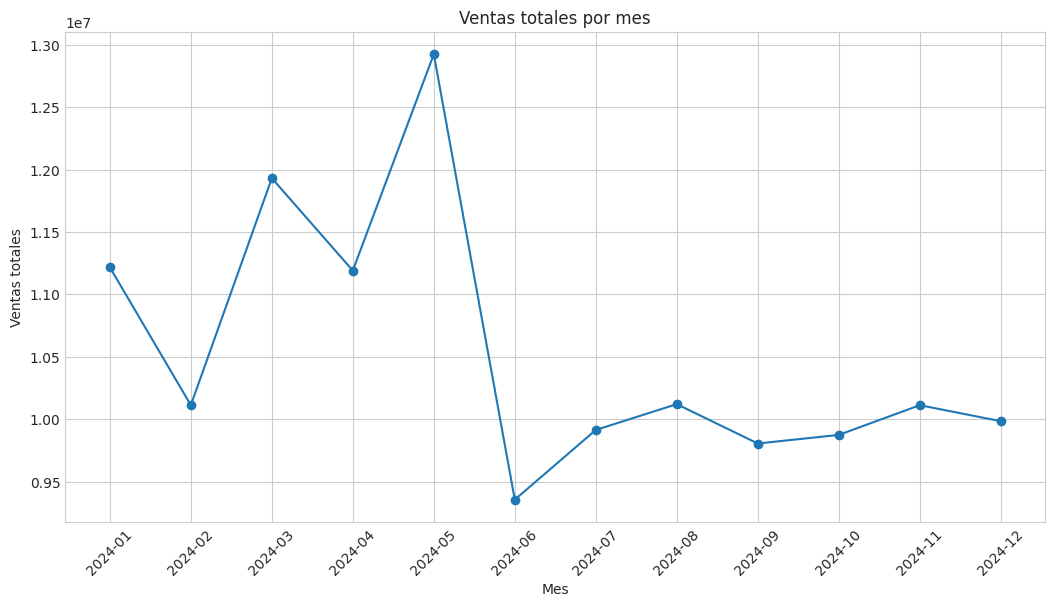

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

ventas['mes'] = ventas['fecha_venta'].dt.to_period('M')

ventas_mensuales = ventas.groupby('mes').agg({
    'importe': 'sum',
    'cantidad': 'sum'
}).reset_index()

ventas_mensuales['mes'] = ventas_mensuales['mes'].astype(str)


x = ventas_mensuales['mes']#meses
y = ventas_mensuales['importe'] #ventas totales por mes

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, marker='o')     # Línea
ax.set_xticklabels(x, rotation=45)
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas totales")
ax.set_title("Ventas totales por mes")
plt.show()

En el gráfico se observa un pico claro de ventas en mayo, seguido por una caída abrupta en junio. Luego las ventas se mantienen estables sin nuevos picos significativos durante el resto del año.

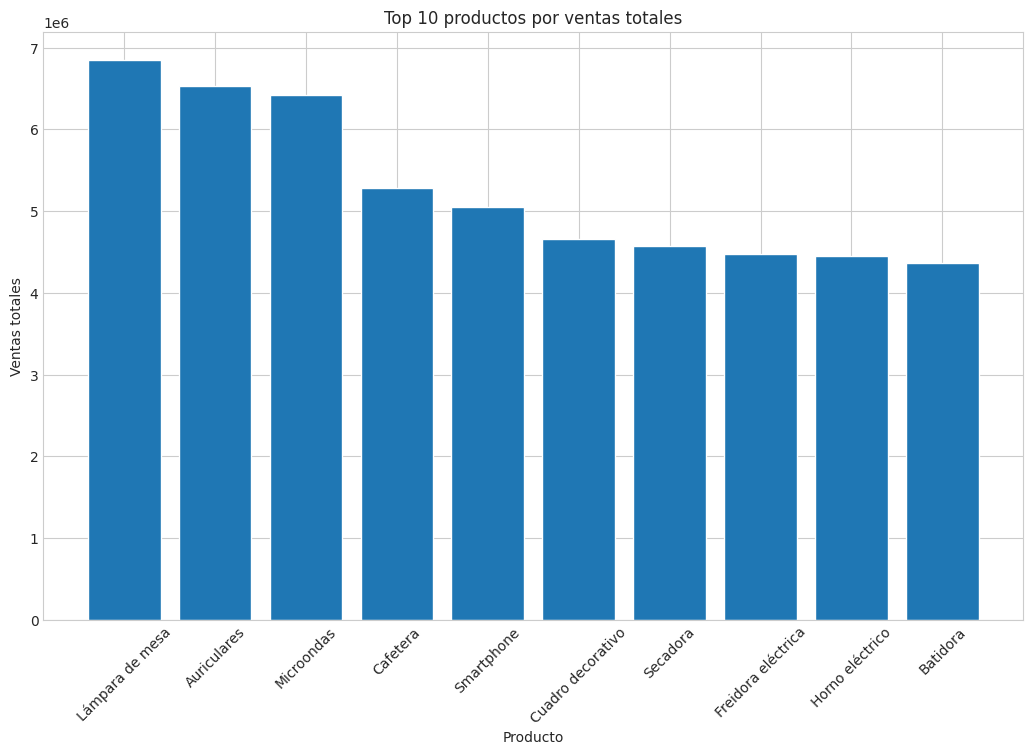

In [78]:
top_productos = df_final.sort_values('ventas_total', ascending=False).reset_index()

plt.figure(figsize=(10,6))
plt.bar(top_productos['producto'].head(10), top_productos['ventas_total'].head(10))
plt.xticks(rotation=45)
plt.title('Top 10 productos por ventas totales')
plt.xlabel('Producto')
plt.ylabel('Ventas totales')
plt.show()



Los 10 productos más vendidos concentran una parte importante del total de ventas. “Lámpara de mesa”, “Auriculares” y “Microondas” lideran claramente el ranking, superando los 6 millones de ventas, mientras que el resto muestra valores más moderados.

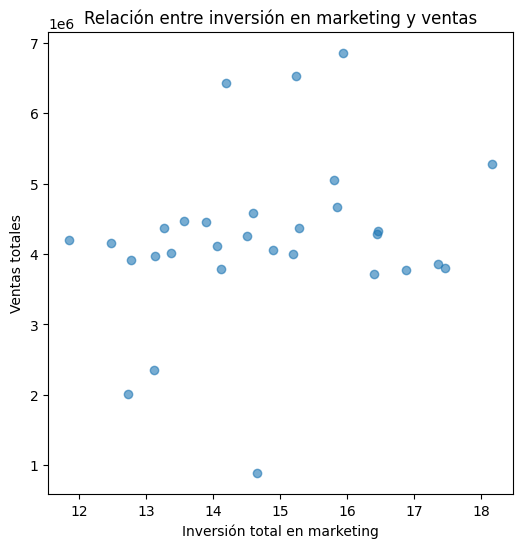

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(prod_global['inversion_total'], prod_global['ventas_total'], alpha=0.6)
plt.xlabel('Inversión total en marketing')
plt.ylabel('Ventas totales')
plt.title('Relación entre inversión en marketing y ventas')
plt.show()


El gráfico no muestra una tendencia clara que indique que mayores inversiones en marketing generen necesariamente mayores ventas. Se observa que productos con niveles de inversión similares pueden tener ventas muy distintas, y algunos productos con inversión relativamente baja alcanzan ventas altas. Esto sugiere que la inversión en marketing no es el único factor que explica el desempeño comercial de cada producto y que existen diferencias en la eficiencia de las campañas.

### 3.3 Correlaciones

In [79]:
corr_variables = prod_global[['ventas_total',
                              'unidades_vendidas',
                              'inversion_total',
                              'ROAS',
                              'ticket_medio']]

corr_matrix = corr_variables.corr()
corr_matrix


,ventas_total,unidades_vendidas,inversion_total,ROAS,ticket_medio
ventas_total,1.000000,0.993915,0.238737,0.921918,0.454943
unidades_vendidas,0.993915,1.000000,0.242179,0.914110,0.363375
inversion_total,0.238737,0.242179,1.000000,-0.147103,0.054356
ROAS,0.921918,0.914110,-0.147103,1.000000,0.445867
ticket_medio,0.454943,0.363375,0.054356,0.445867,1.000000


Interpretación de la matriz de correlación

La matriz de correlación muestra relaciones claras entre varias variables clave:

ventas_total y unidades_vendidas (**0.99**): correlación casi perfecta. Los
productos que venden más unidades son también los que generan más ingresos, lo cual es esperable.

ventas_total y ROAS (**0.92**): existe una relación muy fuerte; los productos con mayores ventas tienden a presentar mejores retornos de inversión publicitaria.

unidades_vendidas y ROAS (**0.91**): los productos de mayor rotación también son los más eficientes desde el punto de vista del marketing.

ventas_total vs inversion_total (**0.23**): correlación baja. Esto indica que invertir más no asegura mayores ventas; la eficacia del marketing varía significativamente entre productos.

ticket_medio muestra correlaciones moderadas con ventas y ROAS, lo que indica que el precio promedio del producto influye, pero no determina el rendimiento.

En conjunto, las correlaciones muestran que el desempeño comercial depende más de las características del producto (volumen y eficiencia) que del nivel de inversión publicitaria.

La correlación negativa entre ROAS e inversión_total (**-0.14**) indica que, en este dataset, a medida que aumenta la inversión en marketing, el retorno por peso invertido tiende a disminuir. Esto sugiere que los productos con mayor presupuesto no logran convertir esa inversión en incrementos proporcionales de ventas. En cambio, los productos con menor inversión suelen presentar un ROAS más alto y una mayor eficiencia. Este comportamiento destaca la importancia de evaluar la rentabilidad de cada campaña y redistribuir el presupuesto hacia los productos con mejor desempeño.

### 3.4 Dataset resumen – df_final

In [ ]:
# 3.4 Consolidación de datos (df_final)

df_final = prod_global[['producto',
                        'ventas_total',
                        'unidades_vendidas',
                        'inversion_total',
                        'campañas',
                        'ticket_medio',
                        'ROAS']].copy()

# Segmento según ventas (alto, medio, bajo)
df_final['segmento'] = pd.qcut(df_final['ventas_total'],
                               q=3,
                               labels=['bajo', 'medio', 'alto'])

df_final.head()


,producto,ventas_total,unidades_vendidas,inversion_total,campañas,ticket_medio,ROAS,segmento
0,Adorno de pared,4.117397e+06,48093.49,14.05,3,85.612352,293053.152491,medio
1,Alfombra,3.808338e+06,44773.06,17.46,3,85.058693,218117.867766,bajo
2,Aspiradora,4.323872e+06,50085.86,16.46,3,86.329204,262689.696294,medio
3,Auriculares,6.529718e+06,74175.58,15.24,3,88.030566,428459.203005,alto
4,Batidora,4.364877e+06,50979.20,15.28,3,85.620752,285659.519660,alto


In [ ]:
df_final.to_csv("resumen_productos.csv", index=False)


# Etapa 4 – Visualización

### 4.1 Matplotlib

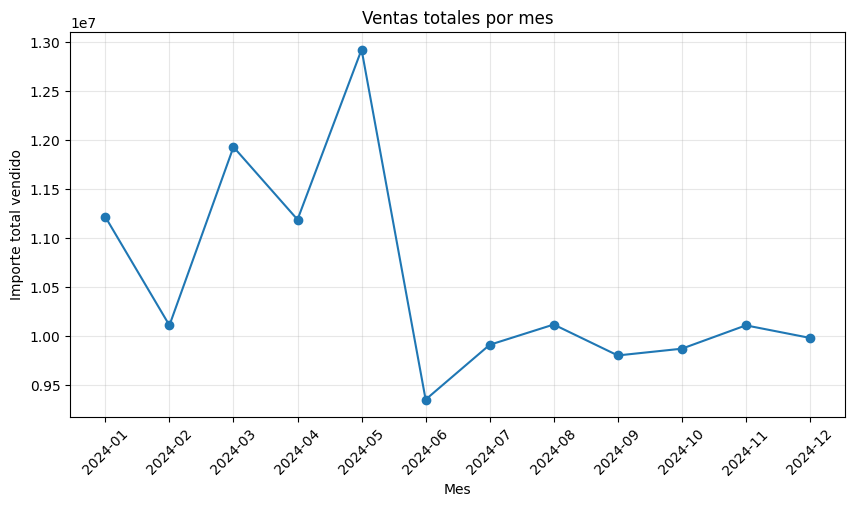

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ventas_mensuales['mes'], ventas_mensuales['importe'], marker='o')
plt.title('Ventas totales por mes')
plt.xlabel('Mes')
plt.ylabel('Importe total vendido')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


Las ventas muestran variaciones mensuales con algunos picos claros. Esto puede deberse a estacionalidad, lanzamientos de campañas o variaciones en la demanda. No se observa una tendencia creciente o decreciente sostenida, sino fluctuaciones mensuales. Se observa una caida fuerte en las ventas de mayo a junio.

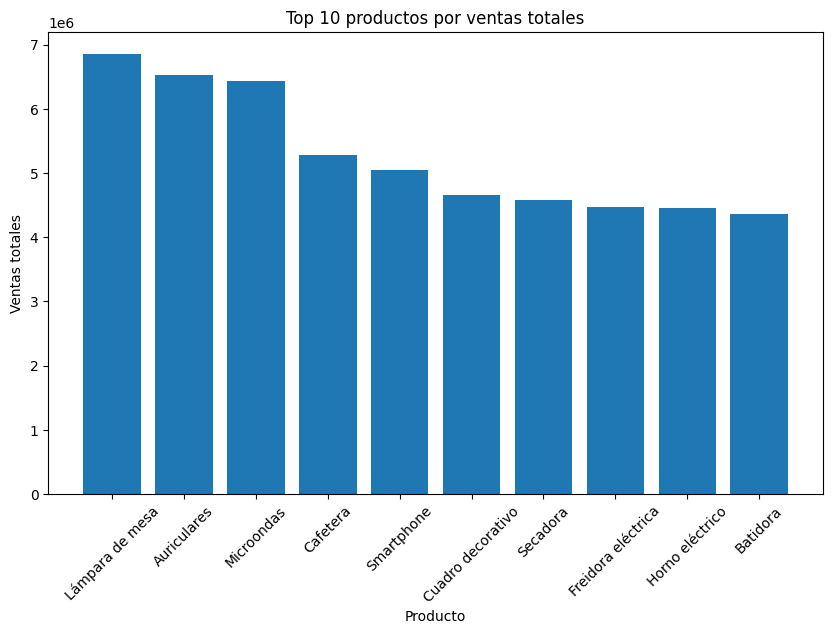

In [ ]:
top10 = prod_global.sort_values('ventas_total', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10['producto'], top10['ventas_total'])
plt.title('Top 10 productos por ventas totales')
plt.xlabel('Producto')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.show()



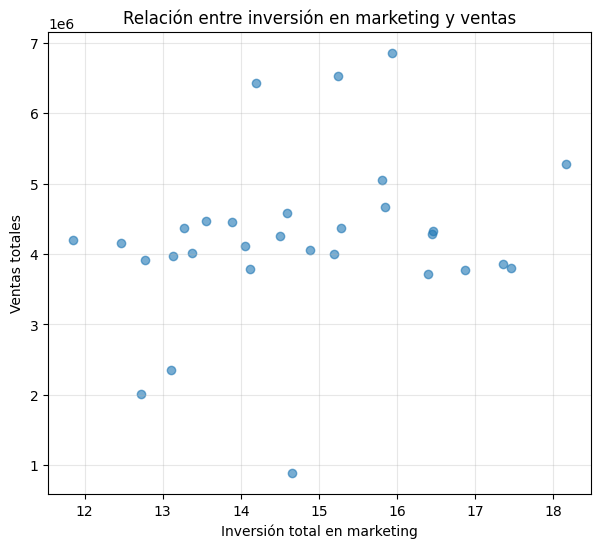

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(prod_global['inversion_total'], prod_global['ventas_total'], alpha=0.6)
plt.title('Relación entre inversión en marketing y ventas')
plt.xlabel('Inversión total en marketing')
plt.ylabel('Ventas totales')
plt.grid(True, alpha=0.3)
plt.show()


El gráfico dispersión muestra que no existe una relación lineal clara entre la inversión en marketing y las ventas totales. Los productos con niveles de inversión similares presentan ventas muy diferentes, lo que indica que la inversión no es el principal factor explicativo del desempeño comercial. Además, algunos productos alcanzan ventas elevadas con niveles moderados de inversión, mientras que otros productos muy invertidos no logran resultados proporcionales. Esto sugiere diferencias importantes en la eficiencia del marketing según el producto y la necesidad de optimizar la asignación presupuestaria.





### 4.2 Seaborn

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")  # estilo pedido por la consigna
palette = "magma"           # paleta elegida


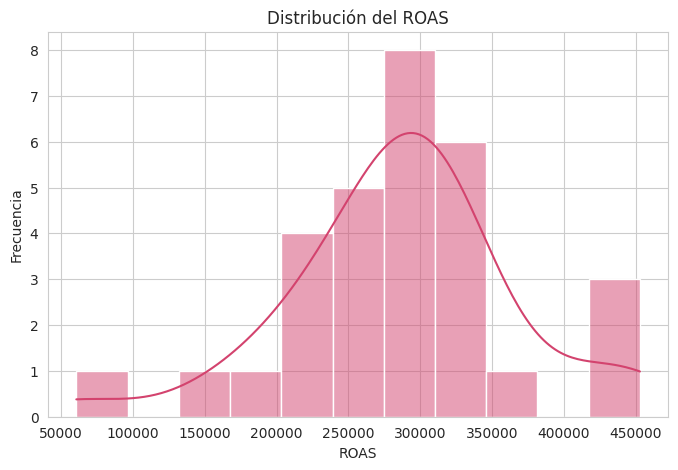

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_final['ROAS'], kde=True, color=sns.color_palette(palette)[3])
plt.title('Distribución del ROAS')
plt.xlabel('ROAS')
plt.ylabel('Frecuencia')
plt.show()


La distribución de ROAS no es uniforme: existen productos con retornos muy superiores al promedio y otros con valores mucho más bajos. Esto indica diferencias importantes en la eficiencia del gasto en marketing entre productos.

/tmp/ipython-input-130408773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_final['ventas_total'], palette=palette)


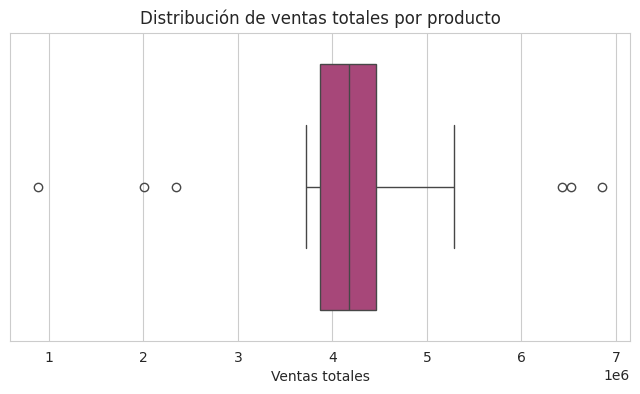

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_final['ventas_total'], palette=palette)
plt.title('Distribución de ventas totales por producto')
plt.xlabel('Ventas totales')
plt.show()


La caja central del boxplot se ubica alrededor de los 4 millones de ventas totales, lo que indica que la mayoría de los productos presenta un desempeño moderado, concentrado entre 3 y 5 millones. La mediana cercana a los 4 millones refuerza que ese es el nivel de ventas más representativo del portafolio. Sin embargo, la presencia de outliers en el rango de 6–7 millones evidencia que únicamente un grupo reducido de productos supera ampliamente este nivel, funcionando como verdaderos productos estrella.

Segmento alto

In [80]:
df_final['segmento'] = pd.qcut(df_final['ventas_total'], q=3, labels=['bajo', 'medio', 'alto'])


In [81]:
productos_alto = df_final[df_final['segmento'] == 'alto']
productos_alto[['producto', 'ventas_total']]


,producto,ventas_total
3,Auriculares,6.529718e+06
4,Batidora,4.364877e+06
5,Cafetera,5.283003e+06
9,Cuadro decorativo,4.661743e+06
13,Freidora eléctrica,4.472311e+06
15,Horno eléctrico,4.448815e+06
19,Lámpara de mesa,6.851353e+06
20,Microondas,6.426303e+06
25,Secadora,4.579770e+06
27,Smartphone,5.053449e+06


Segmento bajo

In [82]:
productos_bajo = df_final[df_final['segmento'] == 'bajo']
productos_bajo[['producto', 'ventas_total']]


,producto,ventas_total
1,Alfombra,3.808338e+06
6,Candelabro,8.874020e+05
7,Consola de videojuegos,3.918456e+06
8,Cortinas,3.858614e+06
10,Cámara digital,3.722729e+06
11,Elementos de cerámica,3.779845e+06
14,Heladera,2.349275e+06
22,Plancha de vapor,3.792860e+06
28,Tablet,2.012135e+06
29,Televisor,3.978033e+06


Segmento alto: Representa el 33% de productos con mayor nivel de ventas → loss productos estrella.

Segmento bajo: Representa el 33% de productos con menor nivel de ventas → productos que podrían requerir revisión, cambios de precio, o menor inversión.

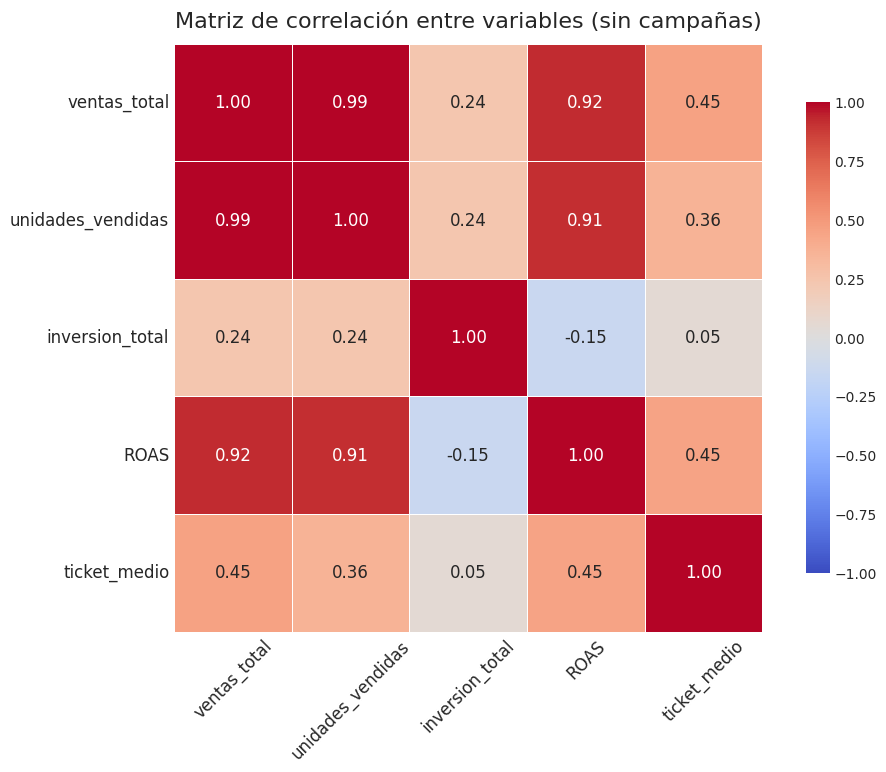

In [86]:
plt.figure(figsize=(9,6))

corr_variables = df_final[['ventas_total',
                           'unidades_vendidas',
                           'inversion_total',
                           'ROAS',
                           'ticket_medio']]

corr_matrix = corr_variables.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',   # más oscuro = correlación fuerte
    fmt=".2f",
    vmin=-1, vmax=1,   # escala típica de correlación
    square=True,
    linewidths=.6,
    linecolor='white',
    annot_kws={"size":12},
    cbar_kws={"shrink":0.8}
)

plt.title('Matriz de correlación entre variables (sin campañas)', fontsize=16, pad=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


El heatmap confirma correlaciones muy altas entre unidades vendidas, ventas totales y ROAS. Por el contrario, la inversión total muestra correlación baja con ventas y ROAS, lo que refuerza la idea de que invertir más no asegura mejores resultados. Es decir, el rendimiento depende más del producto que del monto invertido.

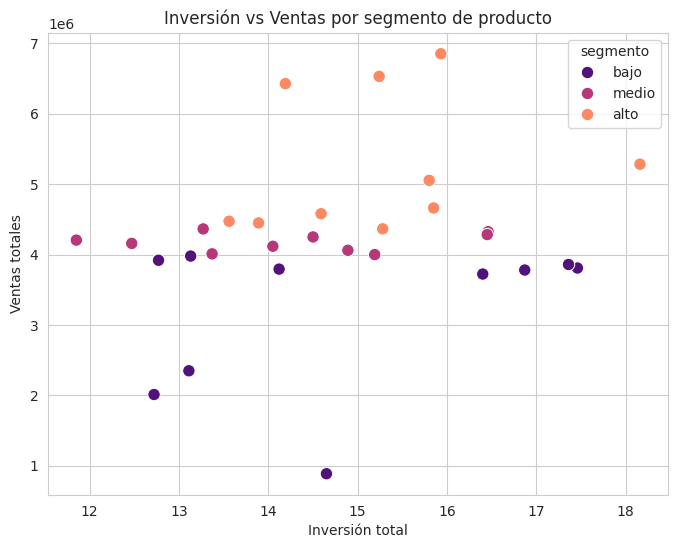

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='inversion_total',
    y='ventas_total',
    hue='segmento',
    palette='magma',
    s=80
)
plt.title('Inversión vs Ventas por segmento de producto')
plt.xlabel('Inversión total')
plt.ylabel('Ventas totales')
plt.show()


Los productos del segmento “alto” concentran mayores ventas incluso con inversiones moderadas, mientras que los productos “bajo” muestran menor rendimiento en ventas pese a inversiones similares. El color (hue) permite identificar rápidamente el desempeño relativo de cada producto dentro del portafolio.

Se utilizó el estilo whitegrid de Seaborn para mejorar la legibilidad y facilitar la interpretación visual de escalas y comparaciones. Además, se aplicó la paleta magma, que permite diferenciar claramente grupos o niveles de intensidad sin perder cohesión visual. Las paletas de color ayudan a destacar patrones, segmentos o distribuciones, especialmente en gráficos con múltiples categorías.

### 4.3 Plotly – Dashboard

In [ ]:
import plotly.express as px


In [ ]:
top10 = df_final.sort_values('ventas_total', ascending=False).head(10)

fig_bar = px.bar(
    top10,
    x='producto',
    y='ventas_total',
    title='Top 10 productos por ventas totales',
    hover_data=['unidades_vendidas', 'ROAS', 'inversion_total']
)

fig_bar.update_layout(xaxis_title='Producto', yaxis_title='Ventas totales')
fig_bar.show()


In [ ]:
fig_line = px.line(
    ventas_mensuales,
    x='mes',
    y='importe',
    title='Ventas totales por mes',
    markers=True
)

fig_line.update_layout(
    xaxis_title='Mes',
    yaxis_title='Importe total vendido',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=3, label="Últimos 3", step="month", stepmode="backward"),
                dict(step="all", label="Todo")
            ])
        ),
        rangeslider=dict(visible=True),
        type="category"
    )
)

fig_line.show()


In [ ]:
fig_scatter = px.scatter(
    df_final,
    x='inversion_total',
    y='ventas_total',
    color='segmento',
    size='ROAS',
    hover_data=['producto', 'ROAS', 'ticket_medio'],
    title='Relación entre inversión en marketing y ventas por segmento de producto'
)

fig_scatter.update_layout(
    xaxis_title='Inversión total en marketing',
    yaxis_title='Ventas totales'
)

fig_scatter.show()


### 4.4 Presentación final – Hallazgos clave

1. ¿Cuáles son los productos estrella?

El análisis de ventas totales y la identificación de outliers muestran que los productos con mayor rendimiento son:

Lámpara de mesa

1.  Lámpara de mesa
2.  Auriculares
3. Microondas


Estos productos concentran una proporción significativa de las ventas totales del portafolio, superando ampliamente los niveles promedio. Se comportan como los principales motores de ingreso de la empresa.

2. ¿Qué aprendimos sobre la relación entre marketing e inversión?

Los resultados indican que:

La correlación entre inversión total y ventas es baja (~0.24).
→ Invertir más no garantiza vender más.

La correlación entre inversión y ROAS es negativa (–0.15).
→ En varios productos, aumentar la inversión reduce la eficiencia publicitaria.

Los productos que más venden también presentan los ROAS más altos, independientemente del nivel de inversión.
→ La eficacia depende más del producto que del presupuesto invertido.

Conclusión: la inversión no es el principal driver del rendimiento; la demanda intrínseca y el posicionamiento del producto son factores más relevantes.

3. ¿Qué indicador resultó más útil para entender el desempeño?

ROAS fue el indicador más informativo, ya que permitió distinguir entre productos que generan ingresos altos con poca inversión y productos donde la inversión no se traduce en eficiencia.

Ventas totales y unidades vendidas mostraron una relación casi perfecta (0.99), por lo que ROAS aportó diferenciación real.

El ticket medio ayudó a interpretar diferencias de precio pero no explicó variaciones fuertes en ventas.

Conclusión: ROAS es el indicador clave para guiar decisiones de marketing y asignación de presupuesto.

4. Recomendaciones para SynthData
A. Reasignación estratégica del presupuesto

Aumentar inversión en productos del segmento alto (alto ROAS + alta demanda).

Reducir o revisar inversión en productos con bajo rendimiento y baja eficiencia.

B. Optimización del portafolio

Priorizar productos estrella como “anclas” para bundles, promociones o campañas estacionales.

Considerar revisión de precios en productos de ticket medio similar pero menor volumen, para mejorar competitividad.

C. Mejora de estrategia de campañas

Revisar segmentación, frecuencia y tipo de campaña, ya que las actuales no muestran un impacto claro sobre ventas.

Evaluar campañas más personalizadas y orientadas a productos con mayor potencial.

D. Monitoreo continuo

Implementar un dashboard permanente que incluya:

ventas totales

ROAS

inversión total

ticket medio

ranking de productos

Esto permitirá detectar rápidamente cambios de comportamiento.